In [1]:
import torch 
import torch.nn as nn
from torch import sigmoid
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(0)

Text(0.5, 1.0, 'Datos')

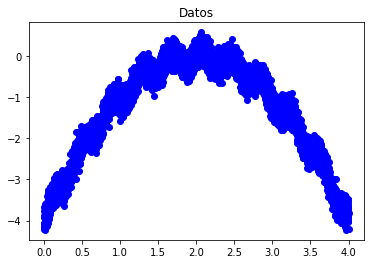

In [3]:
#Se define el dataset 
def f(x):  
    np.random.seed(42) 
    y = -(x-2)**2 + 3*0.05*np.random.randn(x.shape[0]) + .2*np.sin(16*x)
    return y
n = 10000
X_ = np.random.uniform(0,4,n)  
Y_ = f(X_) 
plt.scatter(X_,Y_,label='data', color='blue')
plt.title('Datos')

In [4]:
X = torch.from_numpy(X_)
Y = torch.from_numpy(Y_)

In [5]:
a=list(zip(Y, X))

In [7]:
a


[(tensor(0.0668, dtype=torch.float64), tensor(2.4179, dtype=torch.float64)),
 (tensor(-0.8633, dtype=torch.float64), tensor(1.1426, dtype=torch.float64)),
 (tensor(-0.7401, dtype=torch.float64), tensor(1.1438, dtype=torch.float64)),
 (tensor(-1.0326, dtype=torch.float64), tensor(3.0318, dtype=torch.float64)),
 (tensor(-0.6402, dtype=torch.float64), tensor(2.7217, dtype=torch.float64)),
 (tensor(-2.3718, dtype=torch.float64), tensor(0.4328, dtype=torch.float64)),
 (tensor(-2.1228, dtype=torch.float64), tensor(3.5756, dtype=torch.float64)),
 (tensor(-1.8826, dtype=torch.float64), tensor(0.6091, dtype=torch.float64)),
 (tensor(-1.4758, dtype=torch.float64), tensor(3.2621, dtype=torch.float64)),
 (tensor(-0.1203, dtype=torch.float64), tensor(1.8864, dtype=torch.float64)),
 (tensor(-0.2305, dtype=torch.float64), tensor(1.9092, dtype=torch.float64)),
 (tensor(-1.2756, dtype=torch.float64), tensor(0.8370, dtype=torch.float64)),
 (tensor(-1.2563, dtype=torch.float64), tensor(0.8190, dtype=torc

In [8]:
def PlotStuff(X, Y, model, epoch, leg=True):
    
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    plt.xlabel('x')
    if leg == True:
        plt.legend()
    else:
        pass

In [9]:
# Define the class Net

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        # hidden layer 
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        # Define the first linear layer as an attribute, this is not good practice
        self.a1 = None
        self.l1 = None
        self.l2=None
    
    # Prediction
    def forward(self, x):
        self.l1 = self.linear1(x)
        self.a1 = sigmoid(self.l1)
        self.l2=self.linear2(self.a1)
        yhat = sigmoid(self.linear2(self.a1))
        return yhat

In [45]:
# Define the training function

def train(Y, X, model, optimizer, criterion, epochs=1000):
    cost = []
    total=0
    for epoch in range(epochs):
        total=0
        for y, x in list(zip(Y, X)):

            ###############  PARTE MODIFICADA, UNSQUEEZE, DEBIDO A ERROR DE DIM Y DOUBLE() 
            # DEBIDO A ERROR QUE SE VE ABAJO     ##################################
            aux_=x.double()
            print("formato de variable:",aux_)
            yhat = model(x.unsqueeze(dim=0).double())

            ##############   HASTA AQUI

            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            #cumulative loss 
            total+=loss.item() 
        cost.append(total)
        if epoch % 300 == 0:    
            PlotStuff(X, Y, model, epoch, leg=True)
            plt.show()
            model(X)
            plt.scatter(model.a1.detach().numpy()[:, 0], model.a1.detach().numpy()[:, 1], c=Y.numpy().reshape(-1))
            plt.title('activations')
            plt.show()
    return cost

In [46]:
# The loss function

def criterion_cross(outputs, labels):
    out = -1 * torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))
    return out

In [47]:
# Train the model
# size of input 
D_in = 1
# size of hidden layer 
H = 2
# number of outputs 
D_out = 1
# learning rate 
learning_rate = 0.1
# create the model 
model = Net(D_in, H, D_out)
#optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#train the model usein
cost_cross = train(Y, X, model, optimizer, criterion_cross, epochs=1000)
#plot the loss
plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')

formato de variable: tensor(2.4179, dtype=torch.float64)


RuntimeError: both arguments to matmul need to be at least 1D, but they are 0D and 2D